## Unsupervised Learning

Unsupervised learning process flow is given in figure below. Similar to supervised learning we can train a model and use it to predict the unknow data set, however the key difference is that there is no predifined category or labels available for target variable, and the goal often is to create category or label based on patterns available in data.

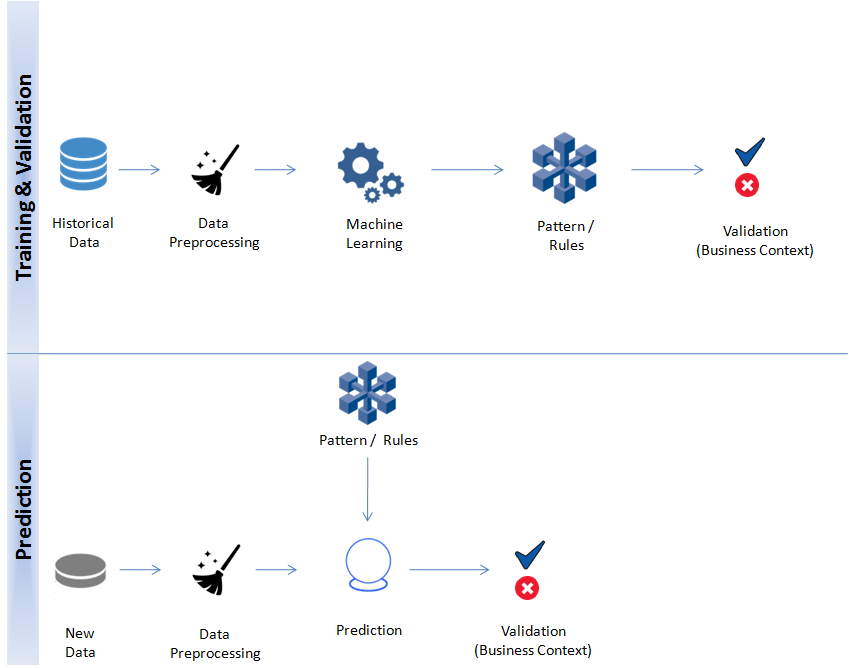

In [34]:
from IPython.display import Image
Image(filename='../Chapter 3 Figures/Unsupervised_Learning_Process_Flow.png', width=500)

### K-means Clustering

Let's load the Iris data and assume for a moment that the species column is missing i.e., we have the measured values for sepal length/width and petal length/width but we do not know how many species exists.

Now let's use unsupervised learning i.e., clustering to find out how many species exists. The goal here is to group all similar items into a cluster.

In [35]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

iris_data = datasets.load_iris()

iris = pd.DataFrame(data=np.c_[iris_data['data'], iris_data['target']],
                    columns=iris_data['feature_names'] + ['species'])

iris.columns = iris.columns.str.replace(' ', '')
print(iris.head())

X = iris.iloc[:, :4].values
y = iris.species.values

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

   sepallength(cm)  sepalwidth(cm)  petallength(cm)  petalwidth(cm)  species
0              5.1             3.5              1.4             0.2      0.0
1              4.9             3.0              1.4             0.2      0.0
2              4.7             3.2              1.3             0.2      0.0
3              4.6             3.1              1.5             0.2      0.0
4              5.0             3.6              1.4             0.2      0.0


In [36]:
# K Means Cluster
model = KMeans(n_clusters=3, random_state=11)
model.fit(X)
print(model.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1]


In [37]:
# since its unsupervised the labels have been assigned
# not in line with the actual lables so let's convert all the 1s to 0s and 0s to 1s
# 2's look fine
iris['pred_species'] =  np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

print ("Accuracy :", metrics.accuracy_score(iris.species, iris.pred_species))
print ("Classification report :", metrics.classification_report(iris.species, iris.pred_species))

Accuracy : 0.05333333333333334
Classification report :               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        50
         1.0       0.00      0.00      0.00        50
         2.0       0.17      0.16      0.17        50

    accuracy                           0.05       150
   macro avg       0.06      0.05      0.06       150
weighted avg       0.06      0.05      0.06       150



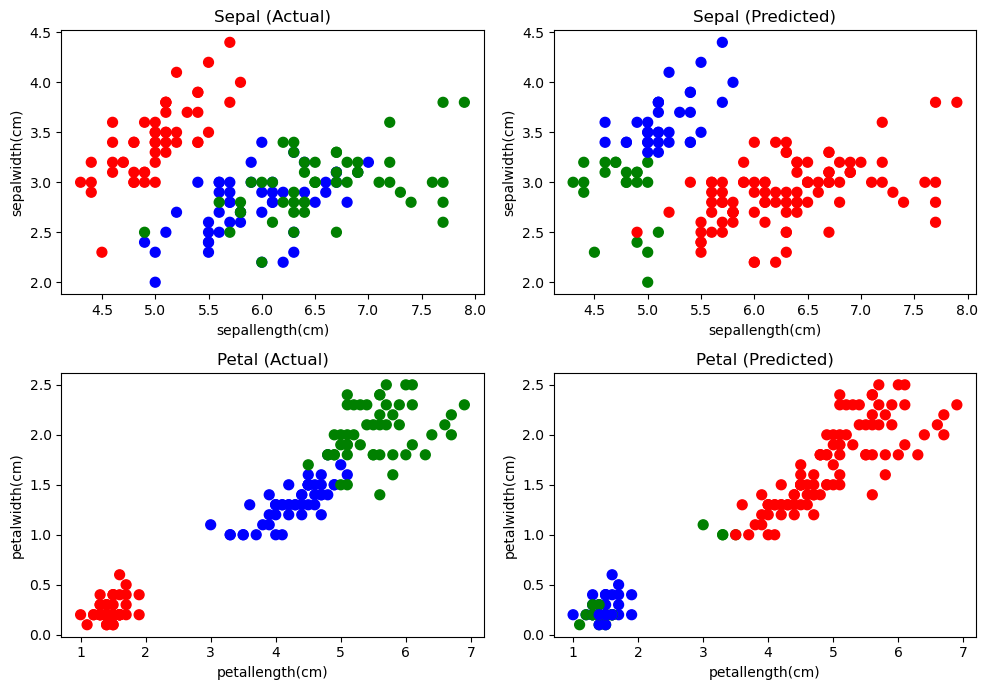

In [38]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(X)
iris['pred_species'] = km.labels_

plt.figure(figsize=(10, 7))

colormap = np.array(['red', 'blue', 'green'])

plt.subplot(2, 2, 1)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=colormap[iris.species.astype(int)], marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal (Actual)')

plt.subplot(2, 2, 2)
plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=colormap[iris.pred_species.astype(int)], marker='o', s=50)
plt.xlabel('sepallength(cm)')
plt.ylabel('sepalwidth(cm)')
plt.title('Sepal (Predicted)')

plt.subplot(2, 2, 3)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=colormap[iris.species.astype(int)], marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('Petal (Actual)')

plt.subplot(2, 2, 4)
plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=colormap[iris.pred_species.astype(int)], marker='o', s=50)
plt.xlabel('petallength(cm)')
plt.ylabel('petalwidth(cm)')
plt.title('Petal (Predicted)')
plt.tight_layout()
plt.show()

### Finding value of K

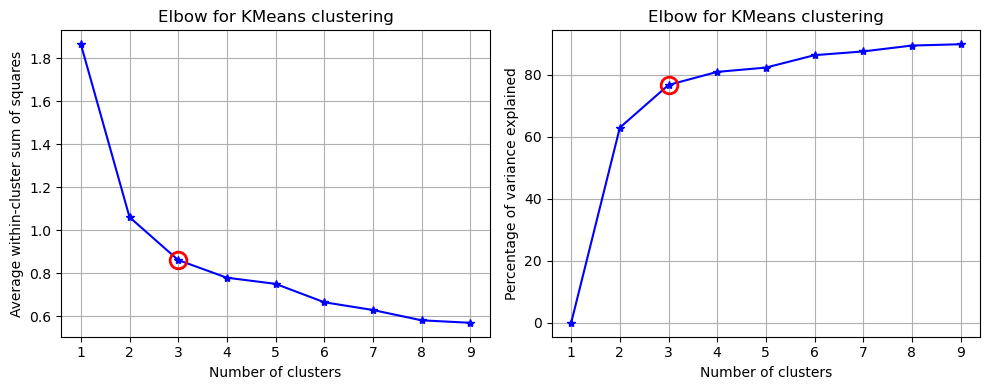

In [39]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = range(1,10)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2)/X.shape[0]
bss = tss-wcss
varExplained = bss/tss*100

kIdx = 10-1
##### plot ###
kIdx = 2

# elbow curve
# Set the size of the plot
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

plt.subplot(1, 2, 2)
plt.plot(K, varExplained, 'b*-')
plt.plot(K[kIdx], varExplained[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')
plt.tight_layout()

### Average silhouette method

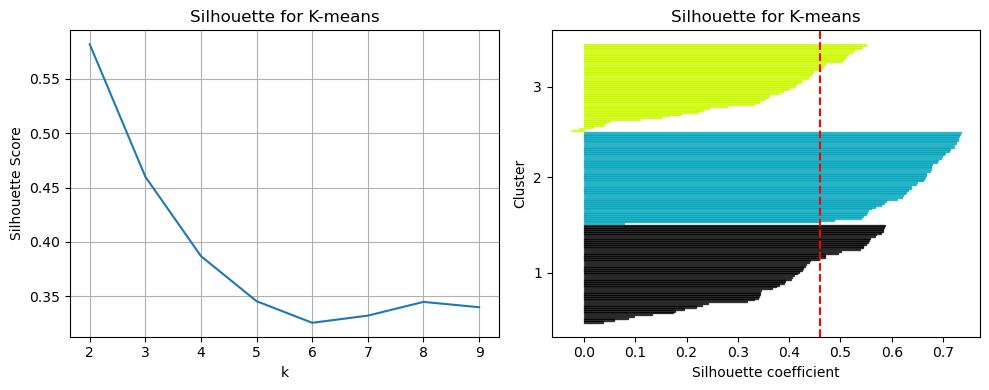

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples # Added silhouette_samples
from matplotlib import cm

# Ensure execution protection for Windows multiprocessing
if __name__ == "__main__":
    # Assuming X is defined previously in your environment
    score = []
    for n_clusters in range(2, 10):
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
        kmeans.fit(X)

        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_

        score.append(silhouette_score(X, labels, metric='euclidean'))

    # Set the size of the plot
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(range(2, 10), score) # Adjusted x-axis to match range
    plt.grid(True)
    plt.ylabel("Silhouette Score")
    plt.xlabel("k")
    plt.title("Silhouette for K-means")

    # Initialize the clusterer with n_clusters value and a random generator
    model = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
    model.fit(X) # Use fit or fit_predict
    cluster_labels = np.unique(model.labels_) 
    n_clusters = cluster_labels.shape[0]

    # Compute the silhouette scores for each sample
    silhouette_vals = silhouette_samples(X, model.labels_)

    plt.subplot(1, 2, 2)

    y_lower, y_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        # Filter silhouette values belonging to the current cluster
        c_silhouette_vals = silhouette_vals[model.labels_ == c]
        c_silhouette_vals.sort()
        y_upper += len(c_silhouette_vals)
        # Updated spectral to nipy_spectral for compatibility
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.barh(range(y_lower, y_upper), c_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
        yticks.append((y_lower + y_upper) / 2)
        y_lower += len(c_silhouette_vals)
        
    silhouette_avg = np.mean(silhouette_vals)

    plt.yticks(yticks, cluster_labels + 1)

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.title("Silhouette for K-means")
    plt.tight_layout()
    plt.show()

### Hierarchical Clustering

In [41]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics 

if __name__ == "__main__":
    
    model = AgglomerativeClustering(n_clusters=3)
    model.fit(X)

    # Print labels with Python 3 syntax
    print(model.labels_)
    iris['pred_species'] = model.labels_

    # Evaluation Metrics
    print("Accuracy :", metrics.accuracy_score(iris.species, iris.pred_species))
    print("Classification report :")
    print(metrics.classification_report(iris.species, iris.pred_species))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 0 2 0 2 0 2 2 2 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Accuracy : 0.013333333333333334
Classification report :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        50
         1.0       0.00      0.00      0.00        50
         2.0       0.07      0.04      0.05        50

    accuracy                           0.01       150
   macro avg       0.02      0.01      0.02       150
weighted avg       0.02      0.01      0.02       150



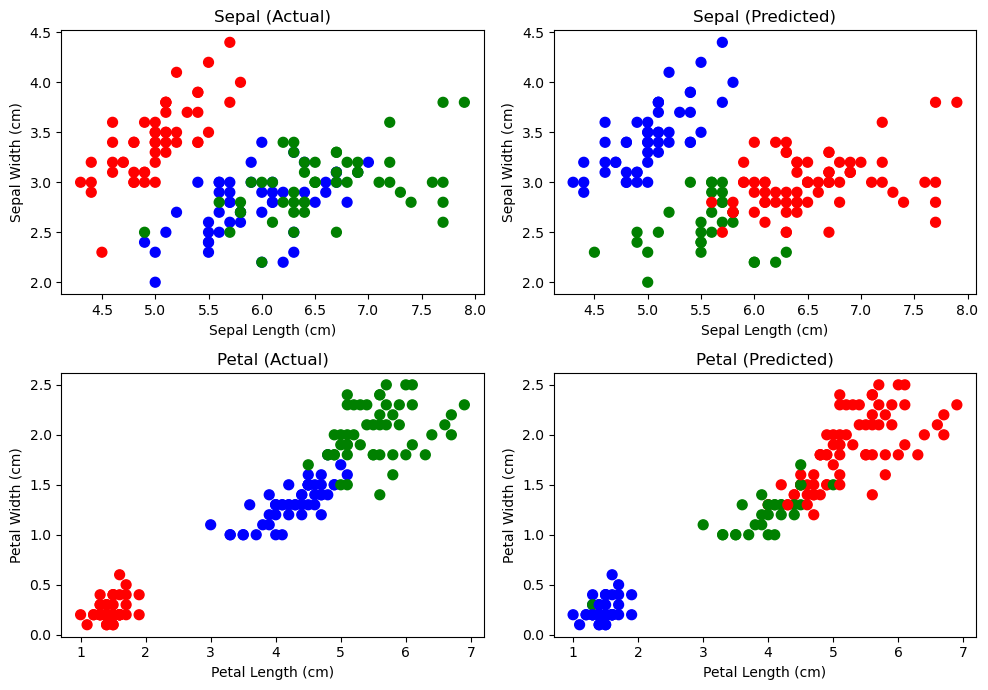

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

if __name__ == "__main__":
    iris['species_id'] = pd.Categorical(iris.species).codes
    
    plt.figure(figsize=(10, 7))
    colormap = np.array(['red', 'blue', 'green'])

    plt.subplot(2, 2, 1)
    plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=colormap[iris.species_id], marker='o', s=50)
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title('Sepal (Actual)')

    plt.subplot(2, 2, 2)
    plt.scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=colormap[iris.pred_species], marker='o', s=50)
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title('Sepal (Predicted)')

    plt.subplot(2, 2, 3)
    plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=colormap[iris.species_id], marker='o', s=50)
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title('Petal (Actual)')

    plt.subplot(2, 2, 4)
    plt.scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=colormap[iris.pred_species], marker='o', s=50)
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title('Petal (Predicted)')

    plt.tight_layout()
    plt.show()

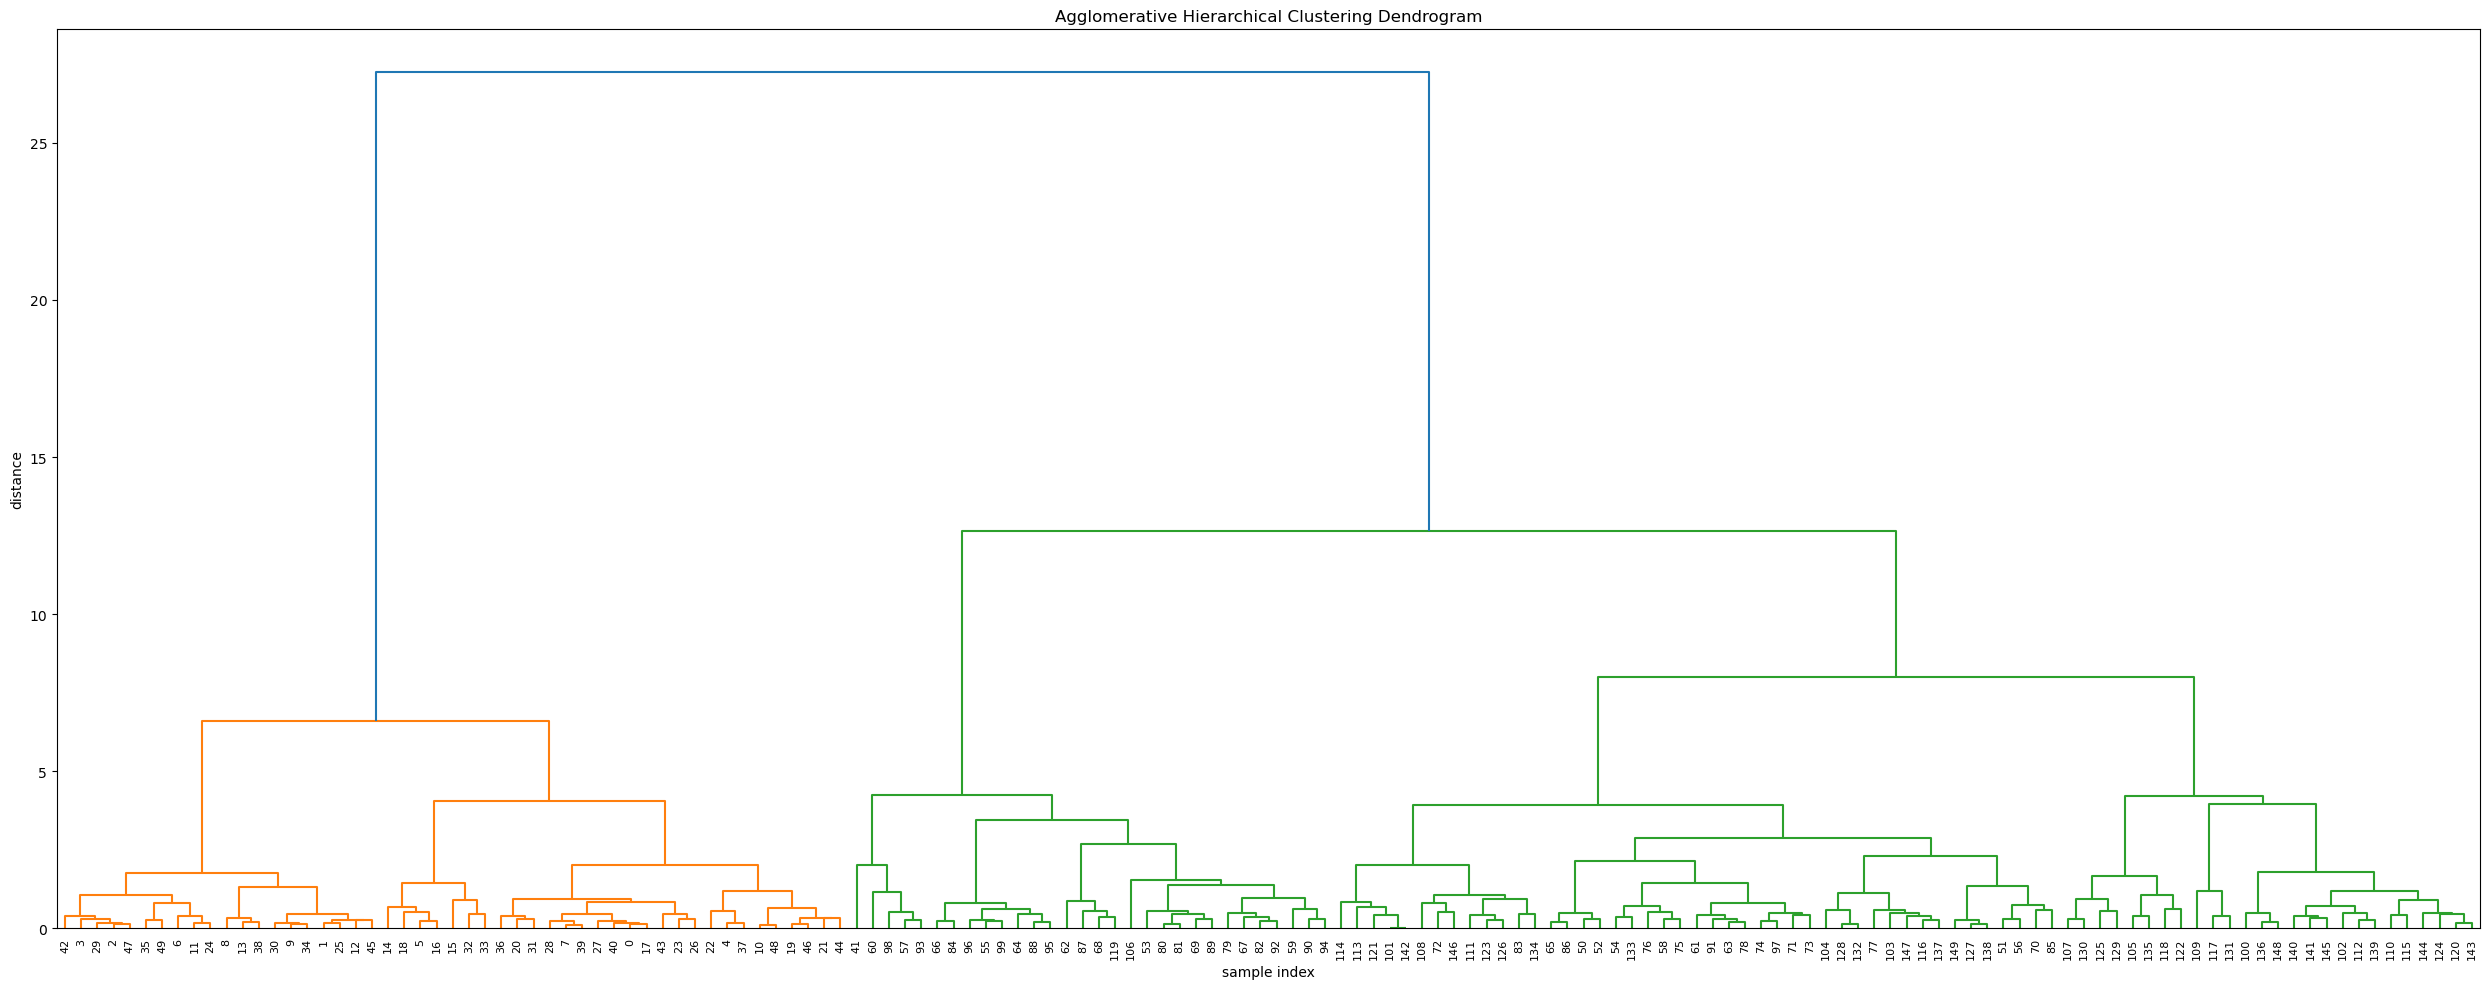

In [43]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

# generate the linkage matrix
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.tight_layout()